In [110]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import time

In [111]:
scale = 0.3

In [112]:
def resize(frame, scale):
    return cv.resize(frame, (int(scale*frame.shape[1]), int(scale*frame.shape[0])))

In [625]:
cv.destroyAllWindows()
shimon_vid = 'IMG_3154.MOV'
bhsmash_vid = "bh_smash.mov"
bhsmashshort_vid = "bh_smash_short.mov"
cap = cv.VideoCapture(bhsmashshort_vid)
frame_count = int(cap.get(cv.CAP_PROP_FRAME_COUNT))

ret, frame1 = cap.read()
frame1_gray = cv.cvtColor(frame1, cv.COLOR_BGR2GRAY)
#plt.imshow(frame1_hsv)
frame1_small = resize(frame1_gray, scale)

flow_hsv = np.zeros_like(resize(frame1, scale))
flow_hsv[...,1] = 255

Frame #:  0
[None None]
Birdie Pixels Found:  0
Mean Position:  65   10


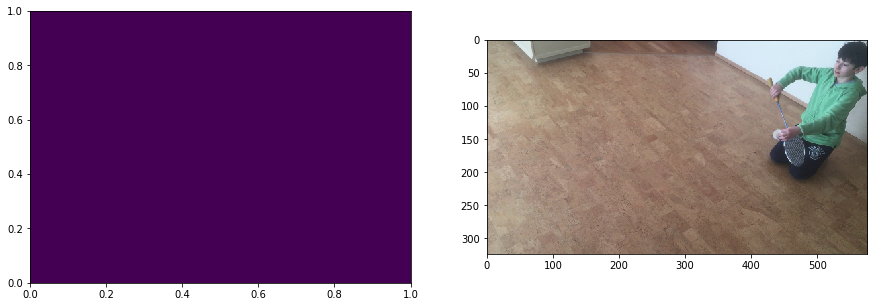

Frame #:  1
[None None]
Birdie Pixels Found:  0
Mean Position:  65   10


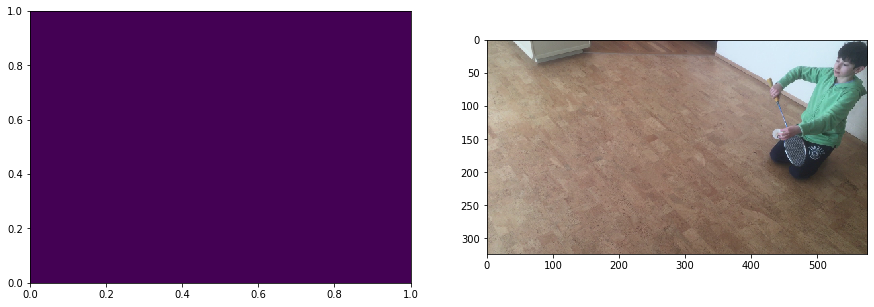

Frame #:  2
[None None]
Birdie Pixels Found:  0
Mean Position:  65   10


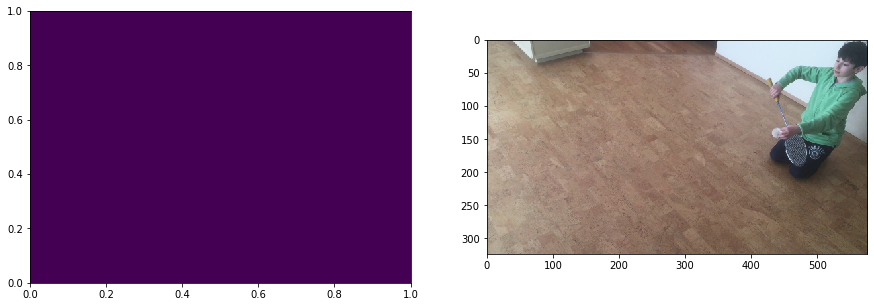

Frame #:  3
[None None]
Birdie Pixels Found:  0
Mean Position:  65   10


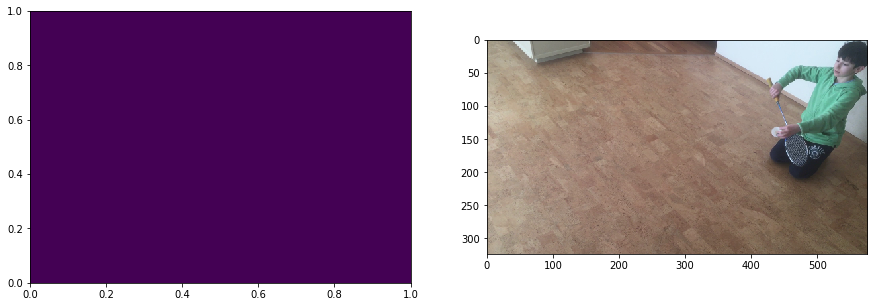

Frame #:  4
[None None]
Birdie Pixels Found:  0
Mean Position:  65   10


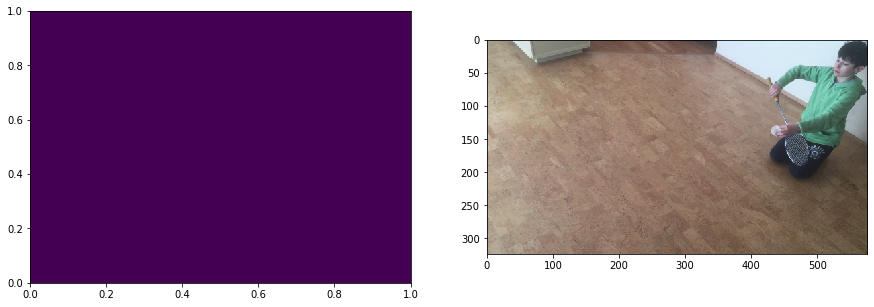

Frame #:  5
[None None]
Birdie Pixels Found:  0
Mean Position:  65   10


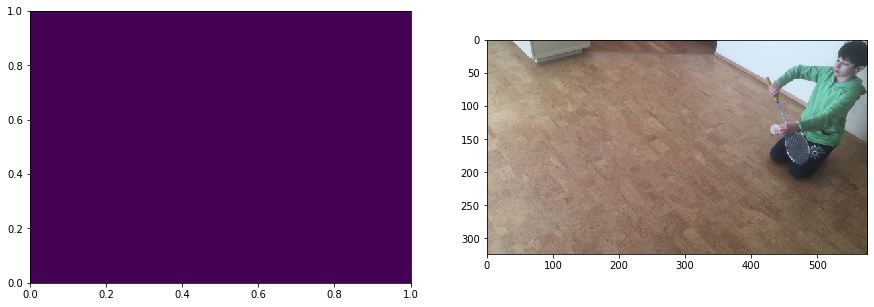

Frame #:  6
[None None]
Birdie Pixels Found:  0
Mean Position:  65   10


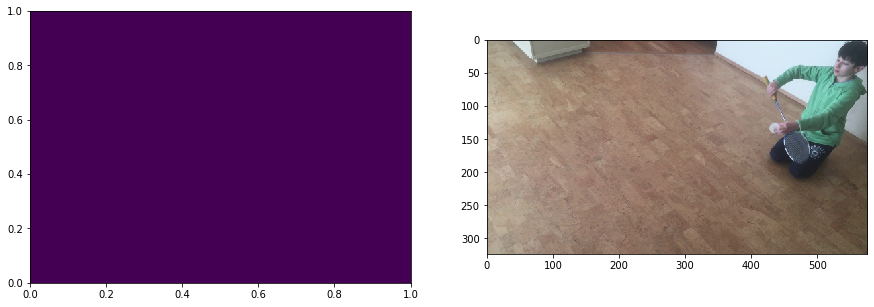

Frame #:  7
[None None]
Birdie Pixels Found:  0
Mean Position:  65   10


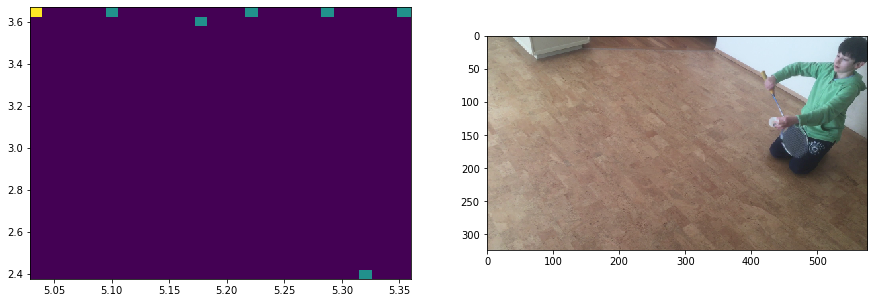

Frame #:  8
[None None]
Birdie Pixels Found:  0
Mean Position:  65   10


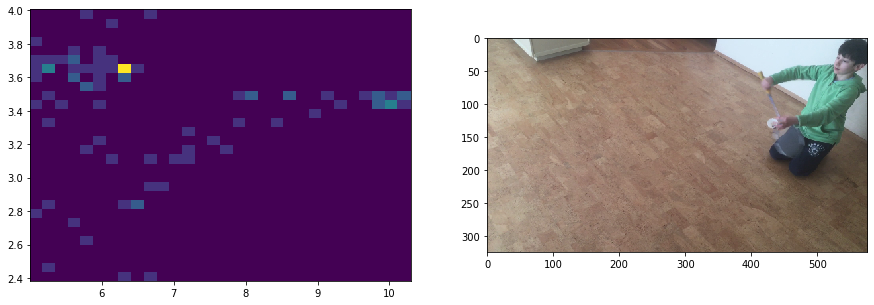

Frame #:  9
[None None]
Birdie Pixels Found:  0
Mean Position:  65   10


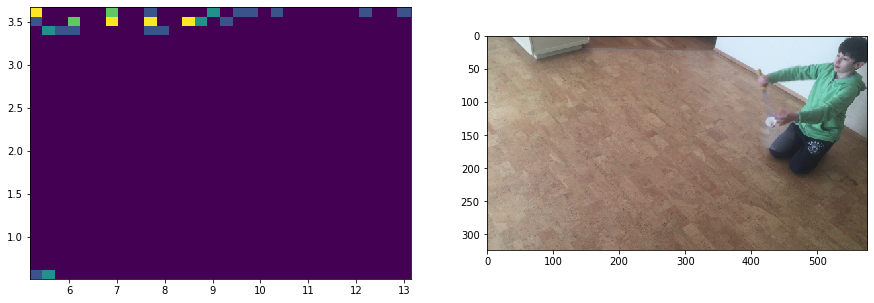

Frame #:  10
[-10.298099517822266 -3.5103461742401123]
Birdie Pixels Found:  0
Mean Position:  65   10


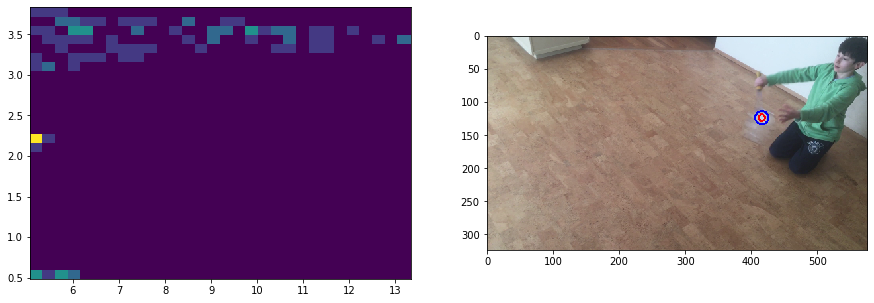

Frame #:  11
[-10.298099517822266 -3.5103461742401123]
Birdie Pixels Found:  0
Mean Position:  65   10


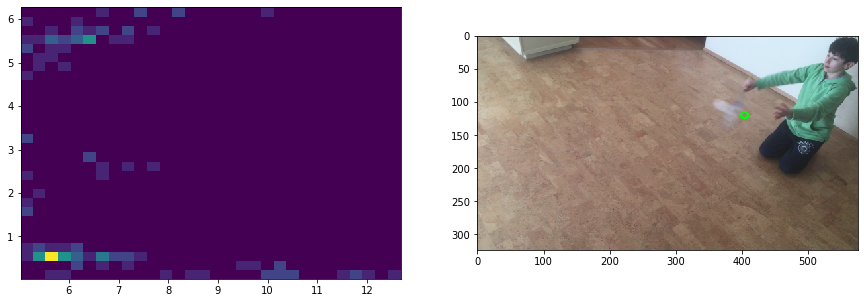

Frame #:  12
[-18.397916793823242 -11.340072631835938]
Birdie Pixels Found:  0
Mean Position:  65   10


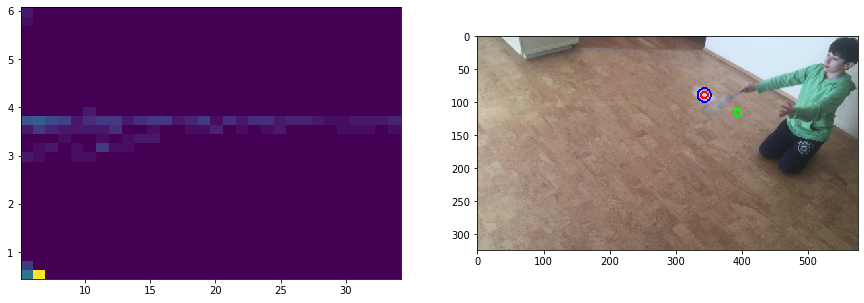

Frame #:  13
[9.098033905029297 5.745508193969727]
Birdie Pixels Found:  0
Mean Position:  65   10


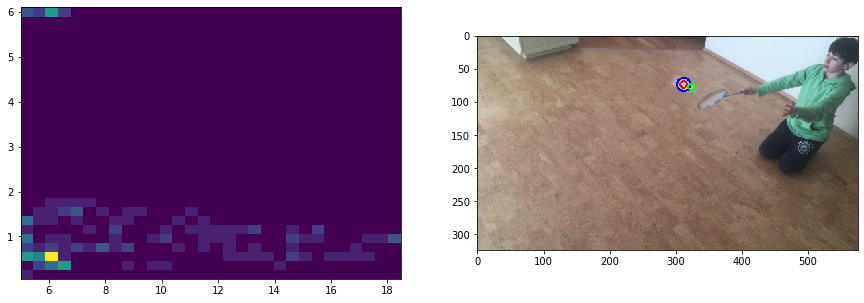

Frame #:  14
[-20.422168731689453 -8.304616928100586]
Birdie Pixels Found:  0
Mean Position:  65   10


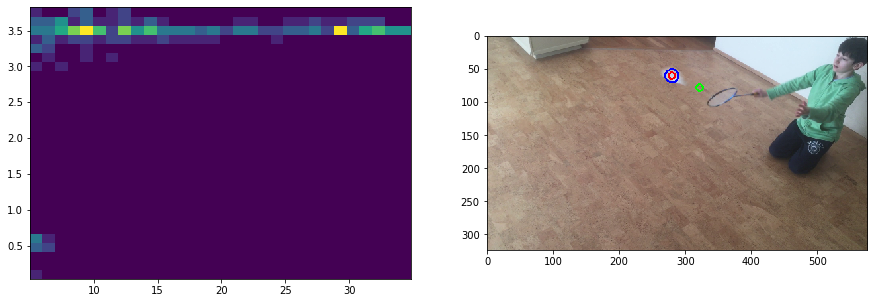

Frame #:  15
[-18.166048049926758 -5.9622883796691895]
Birdie Pixels Found:  0
Mean Position:  65   10


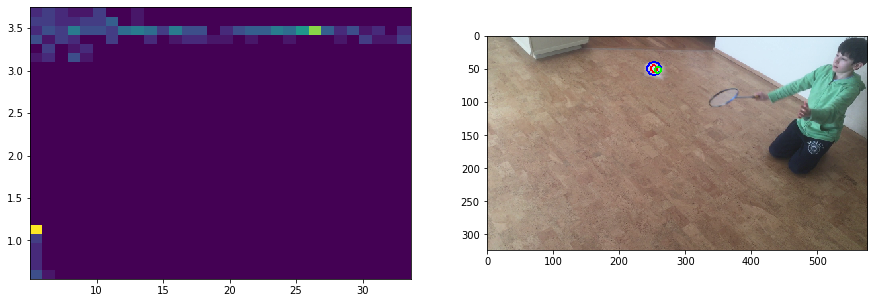

Frame #:  16
[-22.754650115966797 -0.1844465136528015]
Birdie Pixels Found:  0
Mean Position:  65   10


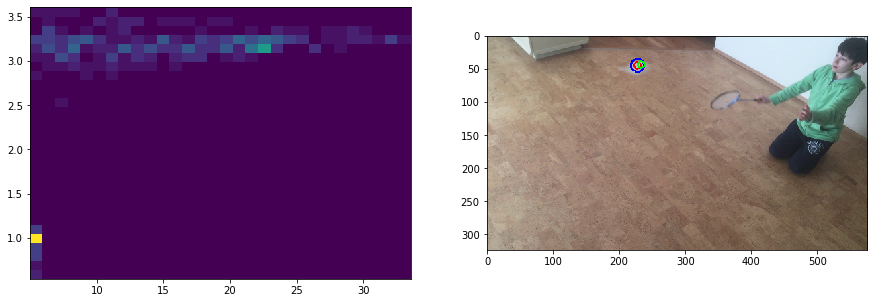

Frame #:  17
[-28.34246253967285 -3.3862698078155518]
Birdie Pixels Found:  0
Mean Position:  65   10


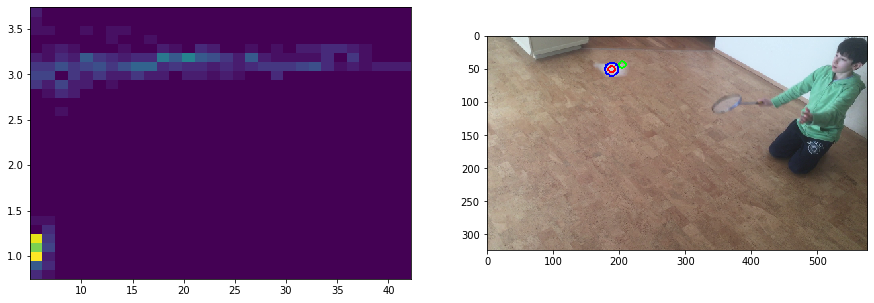

Frame #:  18
[-28.75578498840332 2.2797839641571045]
Birdie Pixels Found:  0
Mean Position:  65   10


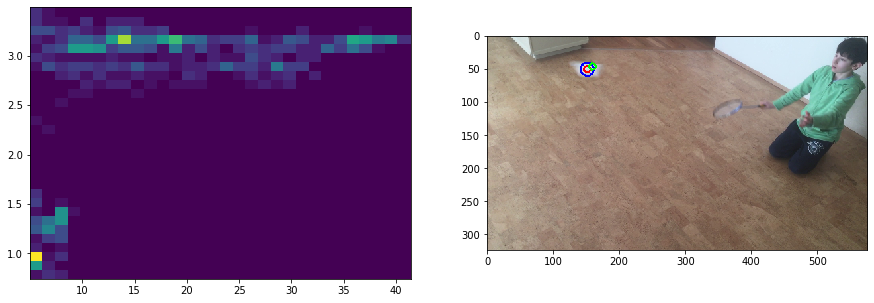

Frame #:  19
[-24.32035255432129 2.7859978675842285]
Birdie Pixels Found:  0
Mean Position:  65   10


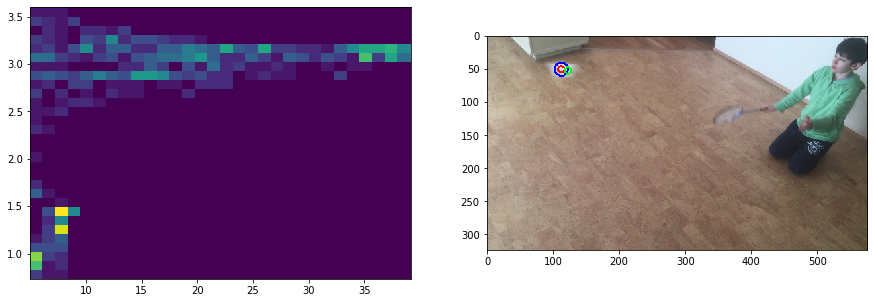

Frame #:  20
[8.618907928466797 -1.588984489440918]
Birdie Pixels Found:  0
Mean Position:  65   10


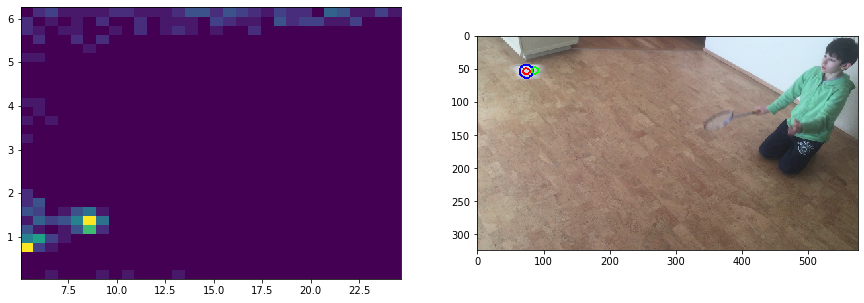

Frame #:  21
[-28.496702194213867 4.16131591796875]
Birdie Pixels Found:  0
Mean Position:  65   10


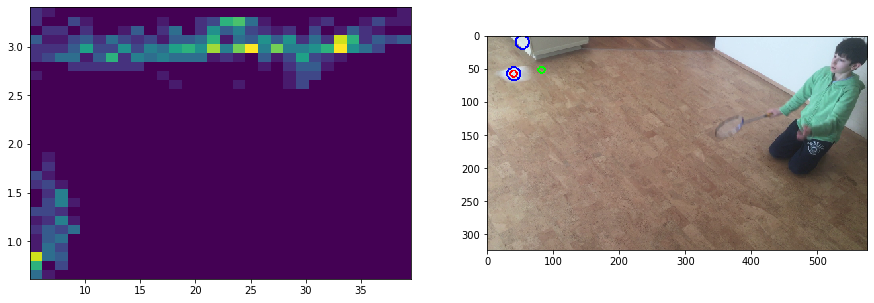

Frame #:  22
[14.805636405944824 -4.540375709533691]
Birdie Pixels Found:  0
Mean Position:  65   10


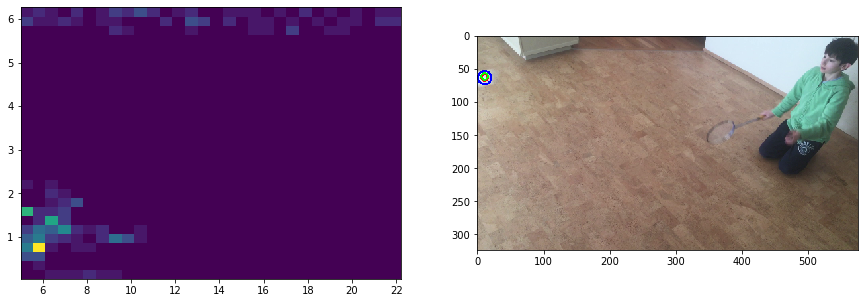

Frame #:  23
[14.805636405944824 -4.540375709533691]
Birdie Pixels Found:  0
Mean Position:  65   10


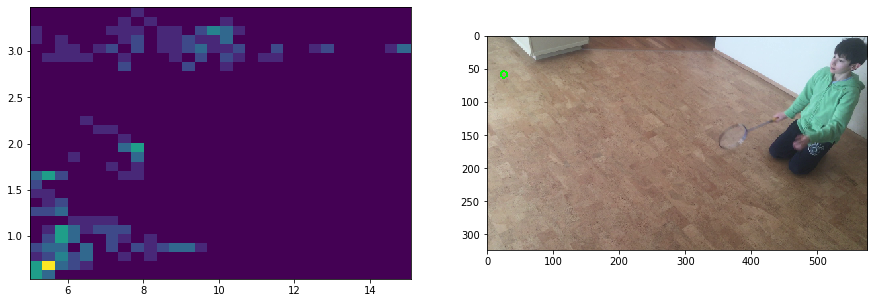

Frame #:  24
[14.805636405944824 -4.540375709533691]
Birdie Pixels Found:  0
Mean Position:  65   10


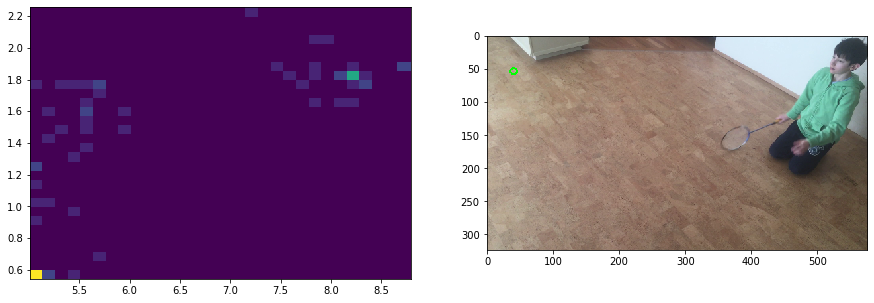

Frame #:  25
[14.805636405944824 -4.540375709533691]
Birdie Pixels Found:  0
Mean Position:  65   10


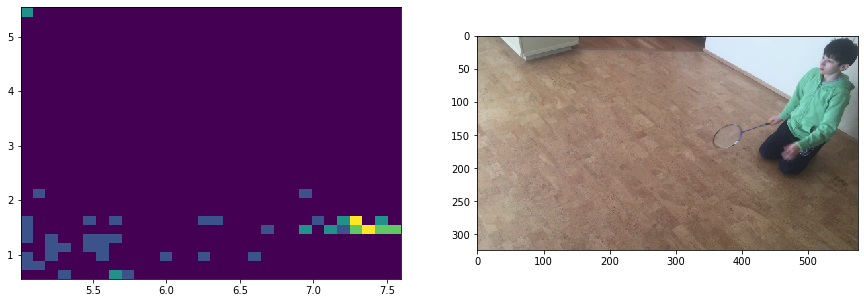

Frame #:  26
[14.805636405944824 -4.540375709533691]
Birdie Pixels Found:  0
Mean Position:  65   10


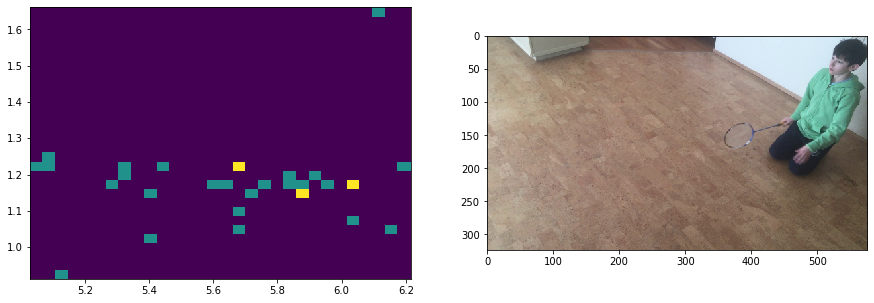

Frame #:  27
[14.805636405944824 -4.540375709533691]
Birdie Pixels Found:  0
Mean Position:  65   10


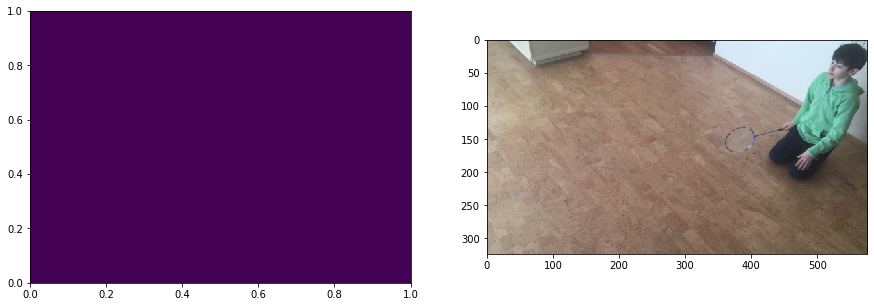

Frame #:  28
[14.805636405944824 -4.540375709533691]
Birdie Pixels Found:  0
Mean Position:  65   10


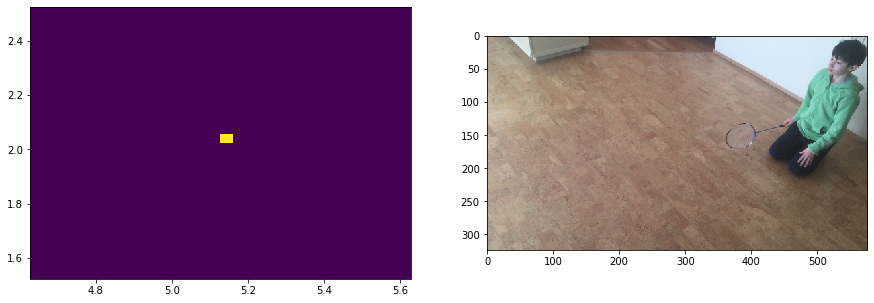

Frame #:  29
[14.805636405944824 -4.540375709533691]
Birdie Pixels Found:  0
Mean Position:  65   10


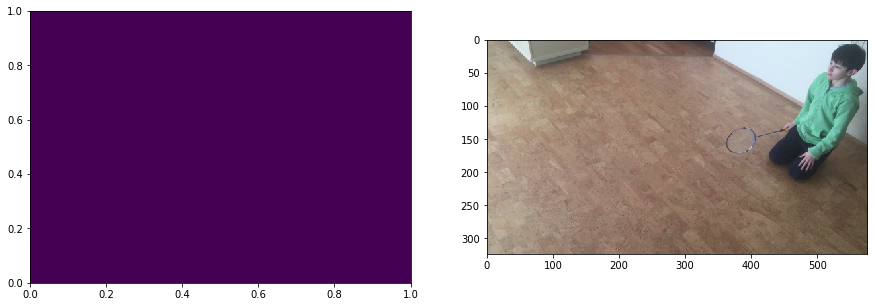

Frame #:  30
[14.805636405944824 -4.540375709533691]
Birdie Pixels Found:  0
Mean Position:  65   10


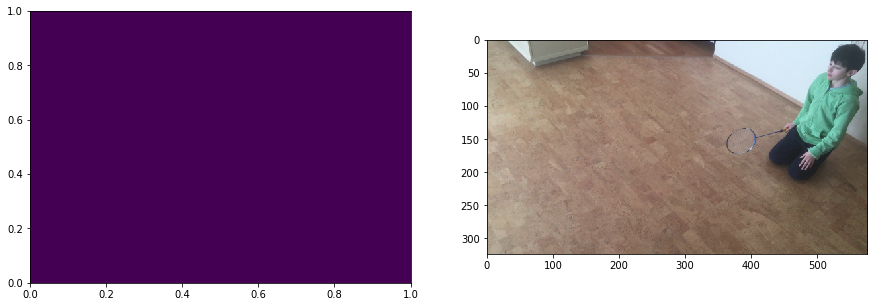

Frame #:  31
[14.805636405944824 -4.540375709533691]
Birdie Pixels Found:  0
Mean Position:  65   10


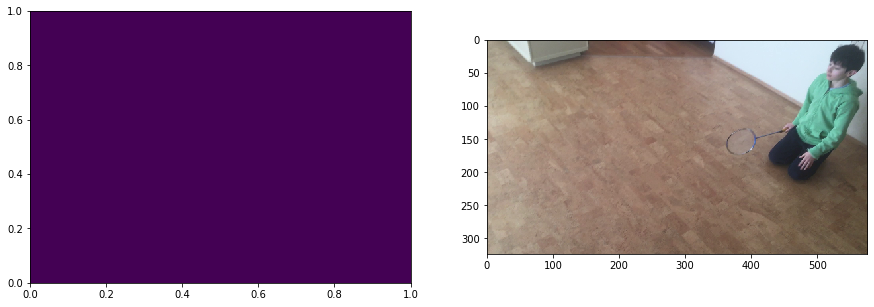

Frame #:  32
[14.805636405944824 -4.540375709533691]
Birdie Pixels Found:  0
Mean Position:  65   10


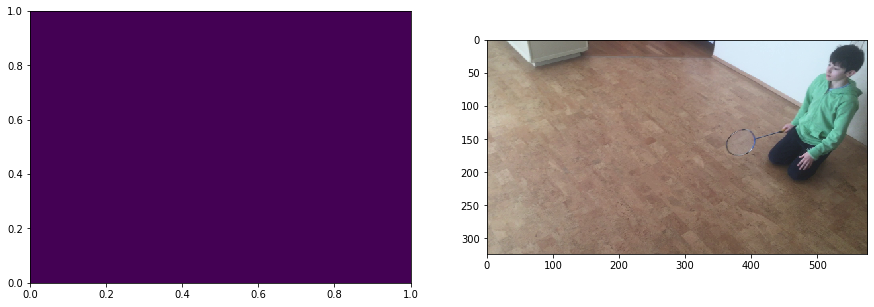

Frame #:  33


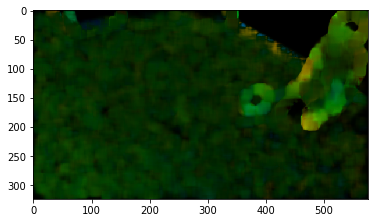

In [589]:
time.sleep(1)
i=0
was_bird_found = False
cur_pos = np.array([None,None])
cur_flow = np.array([None,None])
prev_pos = np.array([None,None])
prev_flow= np.array([None,None])
# while cap.isOpened():
for i in range(0):
    cap.read()
for i in range(frame_count):
    print("Frame #: " , i)
    i+=1
    if (i%2==0):
        pass
    ret, frame2 = cap.read()
    
    # figure out if it's empty
    if not ret:
        break
        
    #resize and make various images
    frame2_small_color = resize(frame2,scale)
    frame2_gray = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)
    frame2_small = resize(frame2_gray,scale)
    
    #thresholding
    ret, frame2_thresh = cv.threshold(frame2_small,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    
    #make flow
    flow = cv.calcOpticalFlowFarneback(frame1_small, frame2_small, None, 0.5, 3, 15, 3, 10, 1.2, 0)
    mag, ang = cv.cartToPolar(flow[...,0], flow[...,1])
    flow_hsv[...,0] = ang*180/np.pi/2
    flow_hsv[...,2] = cv.normalize(mag,None,0,255,cv.NORM_MINMAX)
    bgr = cv.cvtColor(flow_hsv,cv.COLOR_HSV2BGR)
    
    #detect birdie
    ret, frame2_thresh = cv.threshold(frame2_small_color.min(2),np.mean(frame2_small_color)+50,255,cv.THRESH_BINARY)
    frame2_open = cv.morphologyEx(frame2_thresh, cv.MORPH_OPEN, kernel)
    num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(frame2_open , 8 , cv.CV_32S)
    idx_comps = (stats[:, cv.CC_STAT_AREA] < 1000)
    idx_comps = np.logical_and(idx_comps, stats[:, cv.CC_STAT_AREA] > 100)
    idx_clusters_goodsize = np.arange(num_labels)[idx_comps]
    idx_clusters_birds = []
    
    if idx_clusters_goodsize.size > 0:
        for i in idx_clusters_goodsize:
            reg_idx = (labels == i)
            mean_flow = np.mean(mag[reg_idx])
            mean_color = np.mean(frame2_small_color.min(2)[reg_idx])
            if mean_flow > 8:
                idx_clusters_birds.append(i)
    
    for i in idx_clusters_birds:
        cv.circle(frame2_small_color, (int(centroids[i,0]), int(centroids[i,1])), 10, (255,0,0), 2)
    
    if (len(idx_clusters_birds) == 1):
        was_bird_found=True
        
        cluster_bird = idx_clusters_birds[0]
        cur_pos[:] = [int(centroids[cluster_bird,0]), int(centroids[cluster_bird,1])]
        reg_idx = (labels == cluster_bird)
        cur_flow[:] = np.mean(flow[reg_idx],0)
    elif (len(idx_clusters_birds) > 1):
        was_bird_found=True
        
        expected_pos = prev_pos+prev_flow
        centroids_good = centroids.astype(int)[idx_clusters_birds]
        centroids_good = centroids_good-expected_pos
        distances = centroids_good[:,0] * centroids_good[:,0] + centroids_good[:,1] * centroids_good[:,1]
        cluster_bird = idx_clusters_birds[np.where(distances == np.min(distances))[0][0]]
        cur_pos[:] = [int(centroids[cluster_bird,0]), int(centroids[cluster_bird,1])]
        reg_idx = (labels == cluster_bird)
        cur_flow[:] = np.mean(flow[reg_idx],0)
    else:
        if (was_bird_found):
            cur_pos[:] = prev_pos+prev_flow
        else:
            cur_pos[:] = None
        was_bird_found=False
    print(cur_flow)
    if( cur_pos[0] != None):     
        cv.circle(frame2_small_color, (int(cur_pos[0]), int(cur_pos[1])), 5, (0,0,255), 2)
    if(prev_pos[0] != None):
        cv.circle(frame2_small_color, (int(prev_pos[0]+prev_flow[0]), int(prev_pos[1]+prev_flow[1])), 5, (0,255,0), 2)
    prev_pos = cur_pos.copy()
    prev_flow = cur_flow.copy()
    
    """"
    idx_of_movement = (mag > 8)
    idx_of_light = (frame2_small > 190)
    idx_of_color = (frame2_small_color.min(2)>190)
    idx = np.logical_and(idx_of_color, idx_of_movement)
#     frame2_small_color[idx,:] = 0
    row, col = np.where(idx)
    if (row.size>0):
        row_mean = int(row.mean())
        col_mean = int(col.mean())
#         cv.circle(frame2_small_color, (col_mean, row_mean), 10, (0,0,255), 2)
    """
    print("Birdie Pixels Found: " , sum(sum(idx)))
    print("Mean Position: ", row_mean, " ", col_mean)
#     print("Brightest Pixels: ", np.where(frame2_small_color.min(2)==np.amax(frame2_small_color.min(2))))
    
    #show video in new window
    cv.imshow('frame', frame2_small)
    cv.imshow('flow', bgr)
    if cv.waitKey(1) == ord('q'):
        break
    
    #histogram
    step = 5
    mag_ang = np.zeros((mag[0::step,0::step].shape[0]*mag[0::step,0::step].shape[1], 2))
    mag_ang[:,0] = np.reshape(mag[0::step,0::step],mag[0::step,0::step].shape[0]*mag[0::step,0::step].shape[1])
    mag_ang[:,1] = np.reshape(ang[0::step,0::step],ang[0::step,0::step].shape[0]*ang[0::step,0::step].shape[1])
    idx_hist = (mag_ang[:, 0] > 5)
    mag_ang=mag_ang[idx_hist, :]
    
    #display in output
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15,5)
    ax1.hist2d(mag_ang[:,0], mag_ang[:,1], bins=30)
    ax2.imshow(cv.cvtColor(frame2_small_color, cv.COLOR_BGR2RGB))
    plt.show()
    
    #do the swticharoo
    frame1_small=frame2_small
    
        
cap.release()
cv.destroyAllWindows()
cv.destroyAllWindows()

plt.imshow(bgr)

good sized clusters:  [22 23 24 25 26 28]
good sized and colored clusters:  [22 23 24 25 26 28]
[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True False  True False False]
[[189 108]
 [283  19]
 [  2  25]
 [ 66  54]
 [ 71  59]
 [234  65]
 [241  65]
 [208  99]
 [  2 144]
 [179 150]
 [ 13 167]
 [ 31 168]
 [ 40 169]
 [ 48 169]
 [ 60 170]
 [ 77 171]
 [ 93 172]
 [110 173]
 [132 174]
 [146 175]
 [157 175]
 [178 176]
 [212 177]
 [254 178]
 [286 195]
 [109 193]
 [213 199]
 [184 198]
 [252 210]
 [164 212]
 [201 212]]
[[    0     0   384   216 77728]
 [  249     0    85    47  2761]
 [    0    19     7    12    65]
 [   65    51     3     8    24]
 [   70    57     3     5    15]
 [  233    58     3    15    45]
 [  240    63     3     5    15]
 [  207    98     3     4    12]
 [    1   143     3     4    12]
 [  178   149     3     3     9]
 [   11   166     6     3    18]
 [   30  

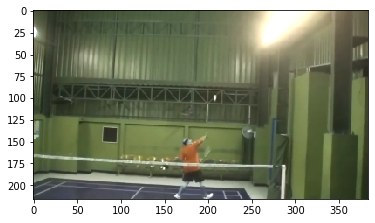

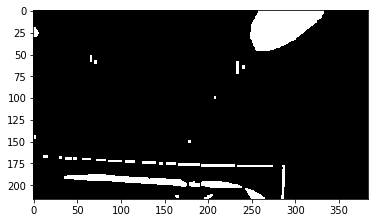

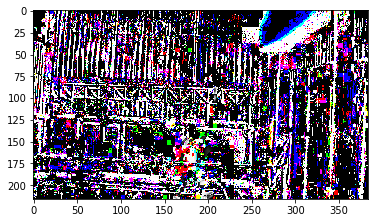

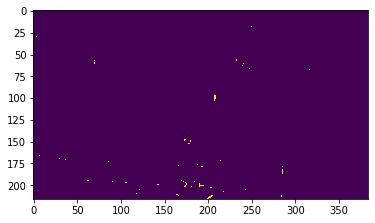

In [638]:
kernel = np.ones((3,3),np.uint8)
ret, frame2_small_color = cap.read()
frame2_small_color = resize(frame2_small_color, scale)
cv.circle(frame2_small_color, (400, 25), 5, (0,0,0), -1)
plt.imshow(frame2_small_color)

ret, frame2_thresh = cv.threshold(frame2_small_color.min(2),np.mean(frame2_small_color)+50,255,cv.THRESH_BINARY)
frame2_open = cv.morphologyEx(frame2_thresh, cv.MORPH_OPEN, kernel)
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(frame2_open , 8 , cv.CV_32S)
idx_comps = (stats[:, cv.CC_STAT_AREA] < 1000)
idx_comps = np.logical_and(idx_comps, stats[:, cv.CC_STAT_AREA] > 100)
clusters_good = np.arange(num_labels)[idx_comps]


print("good sized clusters: " , clusters_good)
for i in clusters_good:
    reg_idx = (labels == i)
    reg_row, reg_col = np.where(reg_idx)
    if (frame2_open[reg_row[0], reg_col[0]] == 0):
        idx_comps[i]= False

# print("good centers: " , centroids[idx_comps])
clusters_good = np.arange(num_labels)[idx_comps]
print("good sized and colored clusters: ", clusters_good)
print(idx_comps)



print(centroids.astype(int))
print(stats)
print(num_labels)

plt.figure()
plt.imshow(frame2_open, cmap="gray")
plt.figure()
plt.imshow(frame2_small_color-frame1)
plt.figure()
plt.imshow(frame2_thresh-frame1_thresh)
print(frame2_thresh-frame1_thresh)
frame1 = frame2_small_color.copy()
frame1_thresh = frame2_thresh.copy()

[[82 82 82 83 83]
 [80 80 80 81 82]
 [78 78 78 79 81]
 [77 78 78 78 78]
 [78 78 78 78 78]]
__________________________
[[ 82  82  82  85  86]
 [ 80  80  82  85  86]
 [ 76  76  88  94  97]
 [ 77  77  92 108 113]
 [ 78  83  96 113 117]]
__________________________
[[[ 2  0  0]
  [ 2  0  0]
  [ 2  0  0]
  [ 5  4  2]
  [ 6  5  3]]

 [[ 2  0  0]
  [ 2  0  0]
  [ 4  2  2]
  [ 6  5  4]
  [ 7  6  4]]

 [[ 0  2  2]
  [ 0  2  2]
  [12 10 10]
  [17 16 15]
  [19 18 16]]

 [[ 3  1  0]
  [ 4  2  1]
  [18 13 14]
  [33 29 30]
  [36 35 35]]

 [[ 4  1  0]
  [ 9  4  5]
  [22 17 18]
  [37 34 35]
  [39 39 39]]]
(array([209]), array([203]), array([0]))


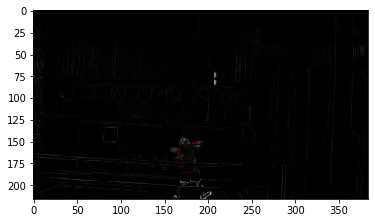

In [636]:
start = 155
stop = 160
ret, frame2_small_color = cap.read()
frame2_small_color = resize(frame2_small_color, scale)

print(frame2_small_color.min(2)[start:stop, start:stop])
print("__________________________")
print(frame1.min(2)[start:stop, start:stop])
print("__________________________")
new = cv.absdiff(frame2_small_color,frame1)
print(new[start:stop, start:stop])

plt.imshow(np.abs(new))

print(np.where(new==new.max()))
frame1 = frame2_small_color.copy()

In [628]:
frame1 = frame2_small_color.copy()

(324, 576)


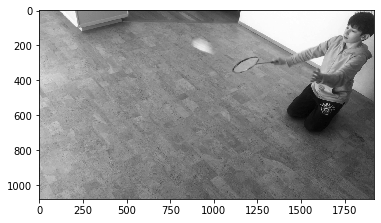

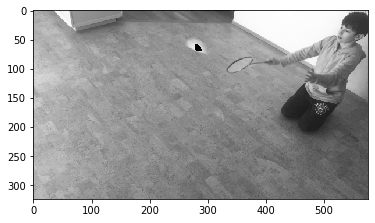

In [102]:
frame2_gray = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)
fig = plt.figure()
frame2_small=resize(frame2_gray,scale)

plt.imshow(frame2_gray, cmap="gray")

row, col = np.mgrid[0:frame2_small.shape[0],0:frame2_small.shape[1]]
row = row.reshape(frame2_small.shape[0],frame2_small.shape[1],1)
col = col.reshape(frame2_small.shape[0],frame2_small.shape[1],1)


frame2_xy = frame2_small.reshape(frame2_small.shape[0],frame2_small.shape[1],1)                                
frame2_xy = np.concatenate((frame2_xy, row),axis=2)
frame2_xy = np.concatenate((frame2_xy, col),axis=2)

frame2_xy_aslist = frame2_xy.reshape(frame2_small.shape[0]*frame2_small.shape[1],3)

frame2_aslist = frame2_small.reshape(frame2_small.shape[0]*frame2_small.shape[1])

idx_of_movement = (mag > 20)
idx_of_light = (frame2_small > 200)
idx = np.logical_and(idx_of_light, idx_of_movement)

frame2_small[idx] = 0

print(idx_of_light.shape)
# print(sum(bool(x) for x in idx_of_light))
# print(sum(idx_of_light))
frame2_small.shape
plt.figure()
plt.imshow(frame2_aslist.reshape(frame2_small.shape[0],frame2_small.shape[1]), cmap="gray")

In [105]:
step = 5
mag_ang = np.zeros((mag[0::step,0::step].shape[0]*mag[0::step,0::step].shape[1], 2))
mag_ang[:,0] = np.reshape(mag[0::step,0::step],mag[0::step,0::step].shape[0]*mag[0::step,0::step].shape[1])
mag_ang[:,1] = np.reshape(ang[0::step,0::step],ang[0::step,0::step].shape[0]*ang[0::step,0::step].shape[1])
mag_ang[]

array([[0.01761375, 3.07111549],
       [0.15970469, 3.02975273],
       [0.50321782, 3.0881691 ],
       ...,
       [1.80218863, 4.44293594],
       [0.92468101, 4.46386576],
       [0.14048745, 4.42755461]])

[[  72   55   25   19  997 2356 2827  239   84   84]
 [  50   30   13    5    7   15  135   75    4   11]
 [  50   22    3    2    1    0   10   34    2    4]
 [  31   19   10    0    0    0   11   14    0    0]
 [  42   15    1    0    0    0    0    0    0    0]
 [  47   26    1    0    0    0    0    0    0    0]
 [  45   31    1    0    0    0    0    0    0    0]
 [   8    0    0    0    0    0    0    0    0    0]
 [   5    0    0    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0    0]]
[ 0  3  6  9 12 16 19 22 25 28 32]
[2.439e-03 6.304e-01 1.259e+00 1.887e+00 2.514e+00 3.143e+00 3.770e+00
 4.398e+00 5.027e+00 5.656e+00 6.281e+00]


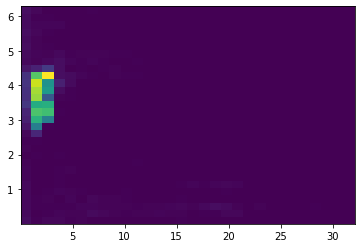

In [116]:
step = 5
# print(np.reshape(mag,(mag.shape[0]*mag.shape[1])))
# print(ang.shape)
#print(flow_hsv[0::step,0::step].shape)

mag[0::step,0::step].shape, ang[0::step,0::step].shape


num, bins = np.histogramdd(mag_ang)
print(num.astype(int))
print(bins[0].astype("int"))
print(bins[1].astype("float16"))

a, b, c, img = plt.hist2d(mag_ang[:,0], mag_ang[:,1], bins=30)
plt.show()
# print(num)
# print(bins.astype(int))

In [ ]:
import numpy as np
import cv2
import sys
## sys.path.append( r'/home/yakov/Github/opencv/samples/python' )
#sys.path.append( r'C:\Users\yakov\Git\Github\opencv\samples\python' )

#import opt_flow as of

def my_draw_flow(img, flow, **kwargs):

    step = kwargs.get( 'step', 5 )
    gr_thresh = kwargs.get( 'gr_thresh', 40 )
    max_val = kwargs.get( 'max_val', 100 )
    max_flow_val = kwargs.get( 'max_flow_val', 0 )

    max_flow_val = min( max_flow_val, max_val )
    red = max( 0, max_flow_val - gr_thresh ) / ( max_val - gr_thresh )
    assert red >= 0.0 and red <= 1.0
    green = 1 - red

    red_int = int( 255 * red )
    green_int = int( 255 * green )

    h, w = img.shape[:2]
    y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2,-1).astype(int)
    fx, fy = flow[y,x].T
    
    lines = np.vstack([x, y, x+fx, y+fy]).T.reshape(-1, 2, 2)
    lines = np.int32(lines + 0.5)
    vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.polylines(vis, lines, 0, (0, green_int, red_int))
    for (x1, y1), (x2, y2) in lines:
        cv2.circle(vis, (x1, y1), 1, (0, green_int, red_int), -1)
    return vis


if __name__ == '__main__':

    video_name1 = 'bird.avi'
    video_name1 = 'brazil.mp4'
    video_name1 = 'new-orleans.mp4'
    video_name1 = 'new-orleans-short-edited.mp4'
    video_name = 'IMG_3150.MOV'
    
    cam = cv2.VideoCapture( video_name )
    ret, prev = cam.read()
    prevgray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)
    prevgray = cv2.resize(prevgray, (int(0.4*prevgray.shape[1]), int(0.4*prevgray.shape[0])))
    show_hsv = False

    height, width, layers = prev.shape
	
    root = video_name.split( '.' )[0] + '_'
    out_flow = cv2.VideoWriter(root + "vector_flow.avi", cv2.VideoWriter_fourcc(*"XVID"), 30,(width,height))
    out_hsv = cv2.VideoWriter(root + "hsv_flow.avi", cv2.VideoWriter_fourcc(*"XVID"), 30,(width,height))

    ## while True:
    window = []
    window_size = 10
    for i in range( 100000 ):
        ret, img = cam.read()
        if not ret:
            break

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray, (int(0.4*gray.shape[1]), int(0.4*gray.shape[0])))
        flow = 10*cv2.calcOpticalFlowFarneback(prevgray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

        max_flow_val = 0
        if i > 5:
            window.insert( 0, flow.max() )
            if len( window ) > window_size:
                window.pop()
            max_flow_val = max( window )

        prevgray = gray

        cur_flow = my_draw_flow(gray, flow, max_flow_val= max_flow_val)
        #cur_hsv = of.draw_hsv(flow)
		
        out_flow.write( cur_flow )
        #out_hsv.write( cur_hsv )
		
        cv2.imshow('flow', cur_flow)
		
        #if show_hsv:
            #cv2.imshow('flow HSV', cur_hsv)

        ch = cv2.waitKey(5)
        if ch == 27:
            break
        if ch == ord('1'):
            show_hsv = not show_hsv
            print('HSV flow visualization is', ['off', 'on'][show_hsv])
    cv2.destroyAllWindows()
    out_flow.release()
    out_hsv.release()
